In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
import os
import plotly.express as px


from sklearn.model_selection import train_test_split

## metric
from sklearn.metrics import accuracy_score , classification_report , mean_squared_error

## preprocessing
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score , cross_val_predict , GridSearchCV , RandomizedSearchCV


## Ensemble
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgp


# Data

In [2]:
path = r"/kaggle/input/air-quality-data-in-india-2017-2022/air-quality-india.csv"

if os.path.exists(path):
    df = pd.read_csv(path)
    print(df.head())
    
else:
    print("Sorry , your file not found.")

             Timestamp  Year  Month  Day  Hour   PM2.5
0  2017-11-07 12:00:00  2017     11    7    12   64.51
1  2017-11-07 13:00:00  2017     11    7    13   69.95
2  2017-11-07 14:00:00  2017     11    7    14   92.79
3  2017-11-07 15:00:00  2017     11    7    15  109.66
4  2017-11-07 16:00:00  2017     11    7    16  116.50


In [3]:
df.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [4]:
df.tail()

,Timestamp,Year,Month,Day,Hour,PM2.5
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29
36191,2022-06-04 15:00:00,2022,6,4,15,40.67


# Describe Of Features 

# Timestamp: This column represents the date and time when the data was recorded. It's a combination of the year, month, day, and hour.

# Year: This column indicates the year when the data was recorded.

# Month: This column indicates the month when the data was recorded.

# Day: This column indicates the day of the month when the data was recorded.

# Hour: This column indicates the hour of the day when the data was recorded.

# PM2.5: This column represents the concentration of particulate matter (PM) with a diameter of 2.5 micrometers or less in the air. PM2.5 is a common air pollutant and can have harmful effects on human health when present in high concentrations.

# (PM) == "Particulate Matter 2.5"

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,36192.0,2019.682278,1.345011,2017.00,2019.00,2020.00,2021.00,2022.00
Month,36192.0,6.331841,3.593321,1.00,3.00,6.00,10.00,12.00
Day,36192.0,15.716401,8.859769,1.00,8.00,16.00,23.00,31.00
Hour,36192.0,11.477840,6.925088,0.00,5.00,11.00,17.00,23.00
PM2.5,36192.0,49.308429,24.863511,7.02,28.08,45.73,64.52,245.63


In [7]:
df.describe(include=object).T

,count,unique,top,freq
Timestamp,36192,36192,2022-06-03 00:00:00,1


In [8]:
df.shape

(36192, 6)

In [9]:
df.isna().sum()

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

<Axes: >

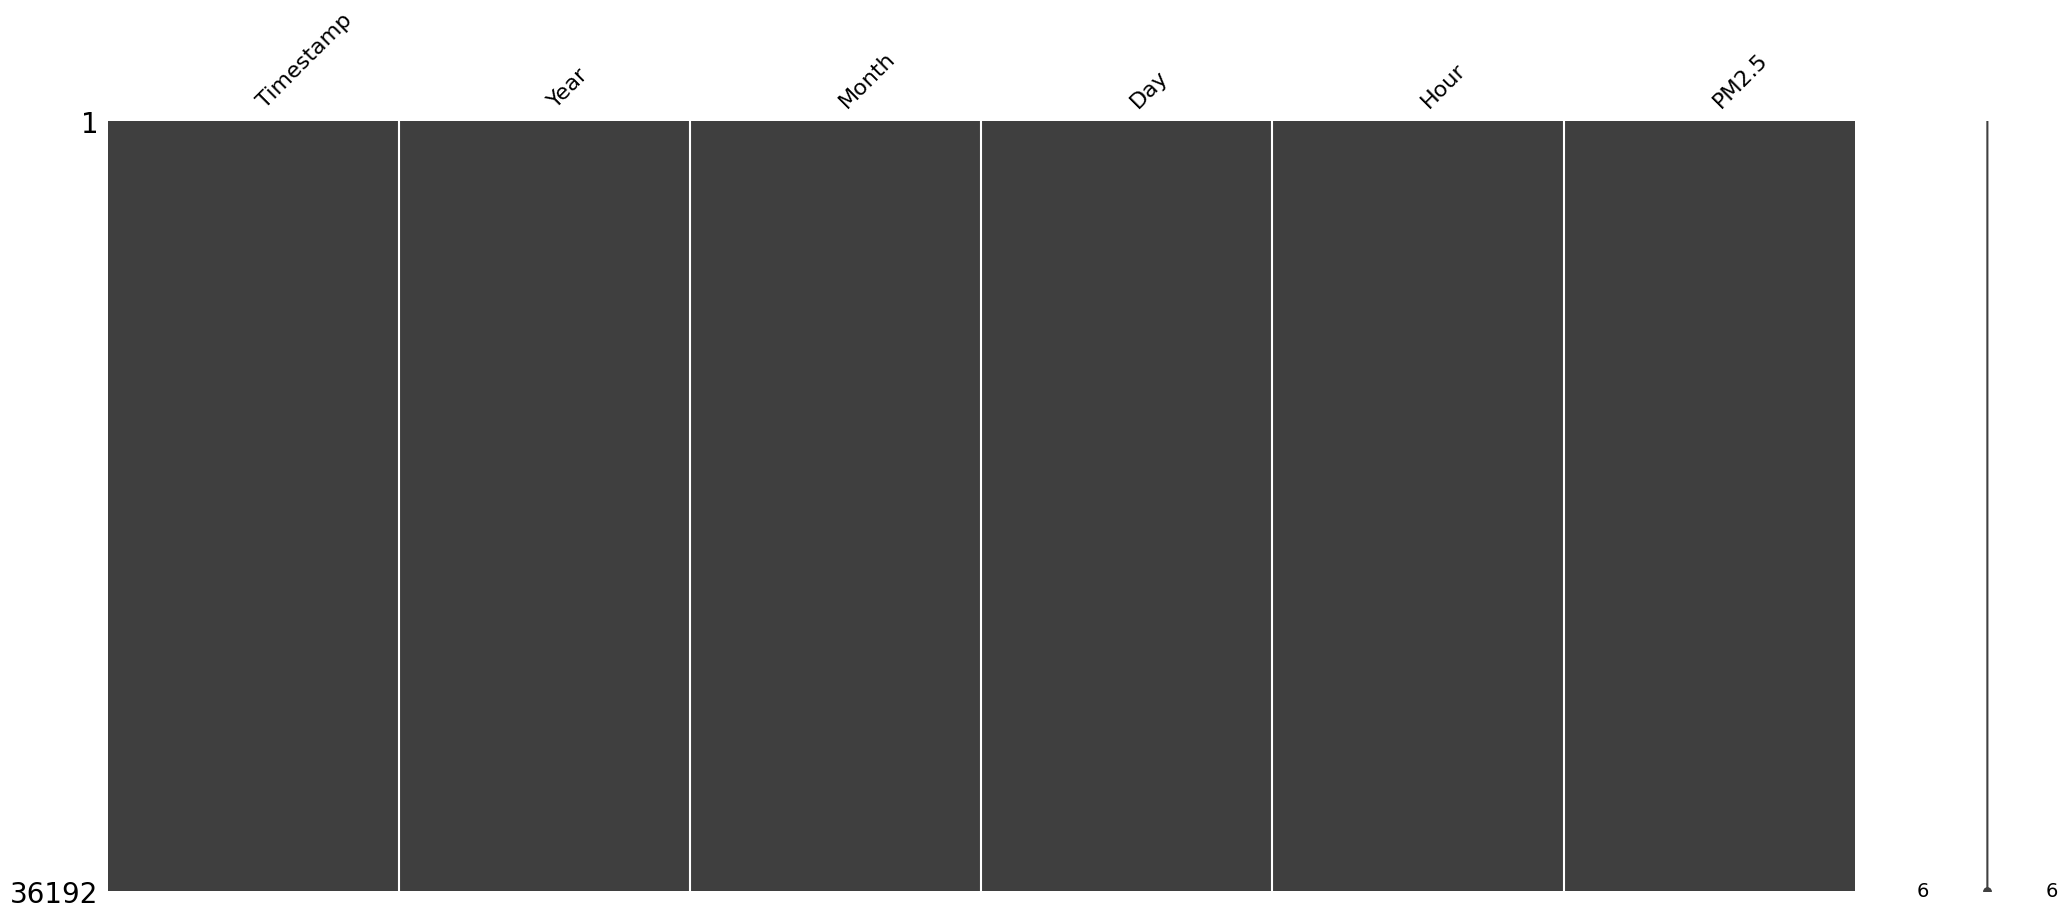

In [10]:
mis.matrix(df)

<Axes: >

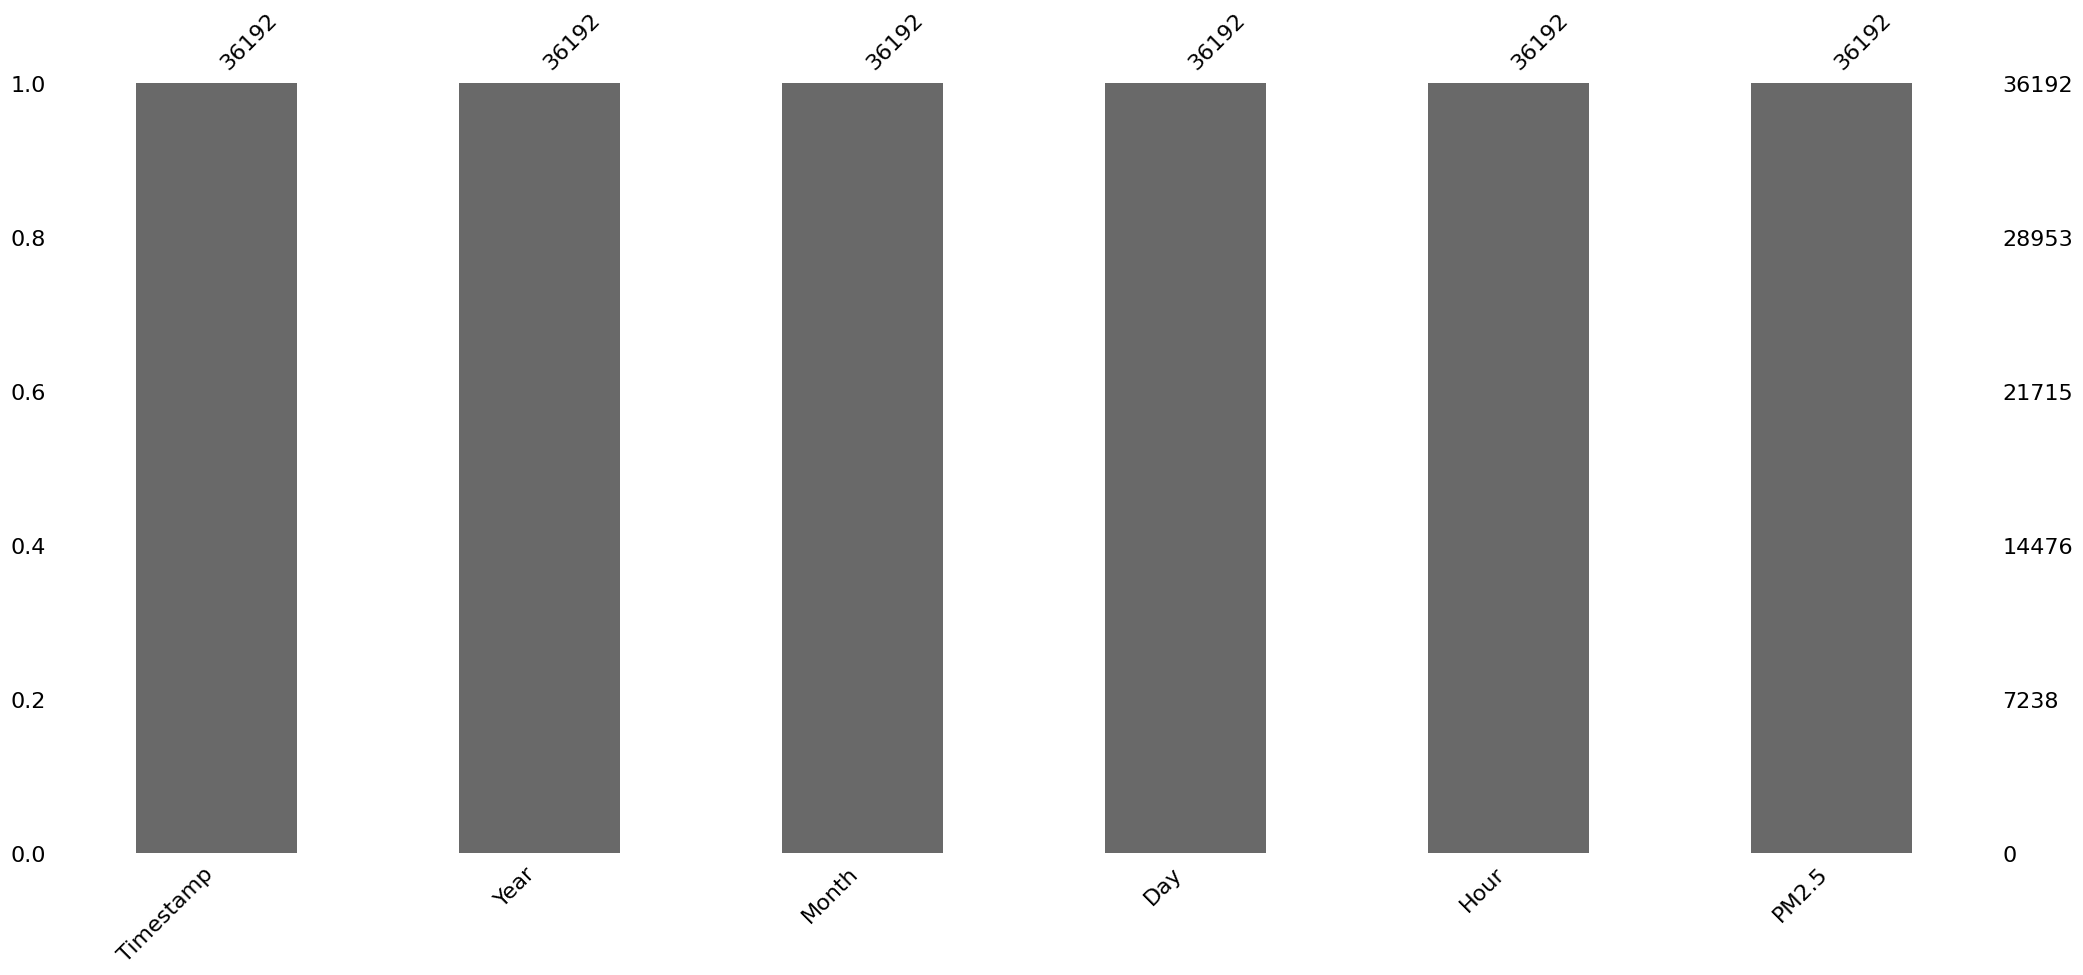

In [11]:
mis.bar(df)

In [12]:
fig = px.scatter(df, x="PM2.5", y="Year", 
                 title="PM2.5 vs Year" , width=1000, height=800)

# Show plot
fig.show()

In [13]:
fig = px.scatter(df, x="PM2.5", y="Month", 
                 title="PM2.5 vs Month" , width=1000, height=800)

# Show plot
fig.show()

In [14]:
fig = px.scatter(df, x="PM2.5", y="Day", 
                 title="PM2.5 vs Day" , width=1000, height=800)

# Show plot
fig.show()

In [70]:
fig = px.scatter(df, x="PM2.5", y="Hour", 
                 title="PM2.5 vs Hour" , width=1000, height=800)

# Show plot
fig.show()

In [15]:
df

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


In [16]:
df.groupby('Month').mean(numeric_only = True)

,Year,Day,Hour,PM2.5
Month,,,,
1,2019.957699,16.145516,11.505358,75.762716
2,2020.068923,14.456615,11.514462,61.233323
3,2020.103995,16.050723,11.510060,51.568116
4,2019.829063,16.208239,11.469024,42.961583
5,2020.195828,15.524907,11.499377,36.068882
6,2019.600437,15.134524,11.412687,28.926157
7,2019.495202,16.274093,11.435962,22.461443
8,2019.492777,15.674559,11.544944,21.525650
9,2019.496593,15.369940,11.456513,24.627094


In [17]:
vg = df["Month"].value_counts()
vg

Month
1     3546
3     3529
12    3428
2     3250
5     3212
11    3203
4     3083
10    2814
6     2743
9     2495
8     2492
7     2397
Name: count, dtype: int64

In [18]:

names =  [1, 3, 12, 2, 5, 11, 4, 10, 6, 9, 8, 7]
values = [3546, 3529, 3428, 3250, 3212, 3203, 3083, 2814, 2743, 2495, 2492, 2397]


fig = px.pie(names=names, values=values, title="Month Distribution of Data")

# Show plot
fig.show()

In [19]:
df["Year"].value_counts()

Year
2020    8356
2021    8283
2019    7685
2018    7537
2022    3194
2017    1137
Name: count, dtype: int64

In [20]:
df.groupby('Year').mean(numeric_only = True)

,Month,Day,Hour,PM2.5
Year,,,,
2017,11.587511,17.166227,11.378188,95.064160
2018,6.602760,15.238424,11.517845,54.468449
2019,6.375537,15.749122,11.457385,49.511273
2020,6.474988,15.855074,11.493538,42.386302
2021,6.442835,15.623566,11.455632,44.850633
2022,3.054164,16.127426,11.484659,50.025717


<Axes: xlabel='Year'>

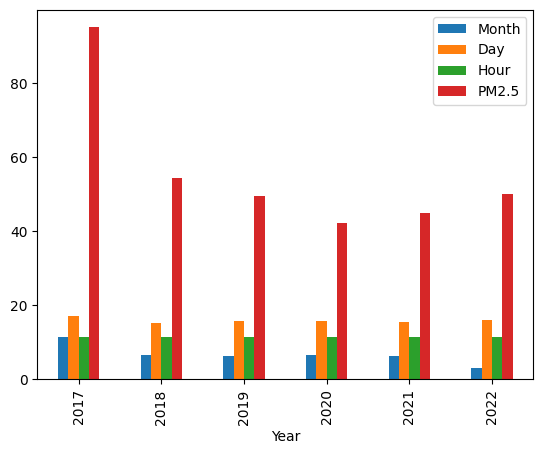

In [21]:
df.groupby('Year').mean(numeric_only = True).plot(kind = 'bar')   # line

In [22]:
names = ['2020', '2021', '2019', '2018', '2022', '2017']
values = [8356, 8283, 7685, 7537, 3194, 1137]

# Create pie chart
fig = px.pie(names=names, values=values, title="Distribution of Data")

# Show plot
fig.show()

In [23]:
fig = px.box(data_frame=df , x=df["Year"] , y=df["PM2.5"] ,
             title="Boxplot of Year & PM2.5",color_discrete_sequence=['black'])
fig.show()

In [24]:
num_df = df._get_numeric_data()
num_df

,Year,Month,Day,Hour,PM2.5
0,2017,11,7,12,64.51
1,2017,11,7,13,69.95
2,2017,11,7,14,92.79
3,2017,11,7,15,109.66
4,2017,11,7,16,116.50
...,...,...,...,...,...
36187,2022,6,4,11,35.89
36188,2022,6,4,12,33.83
36189,2022,6,4,13,33.05
36190,2022,6,4,14,35.29


In [25]:
import warnings
warnings.filterwarnings("ignore")

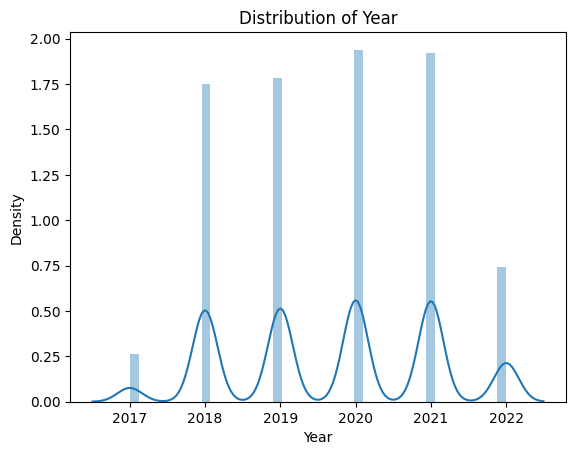

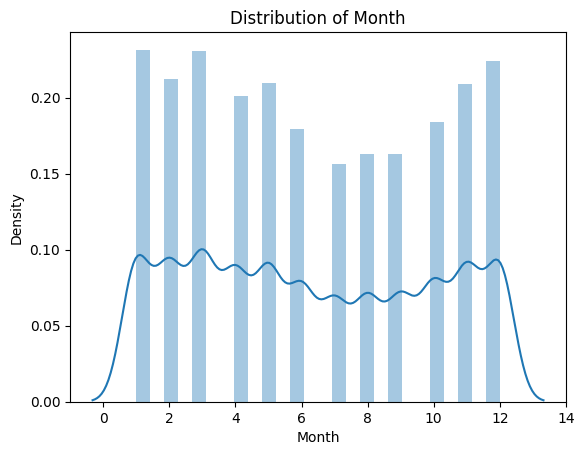

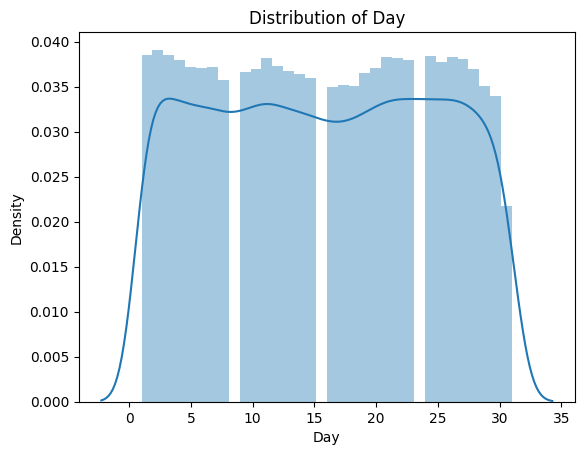

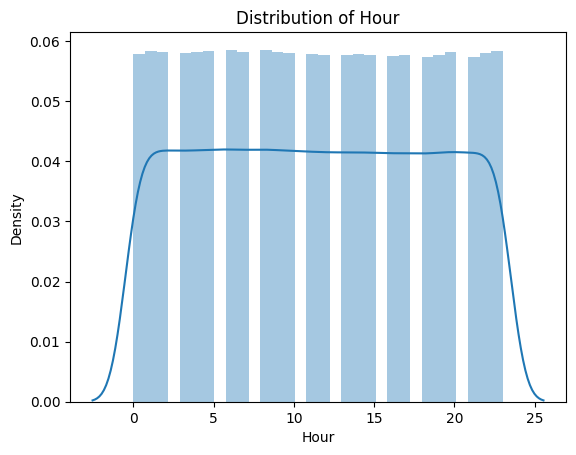

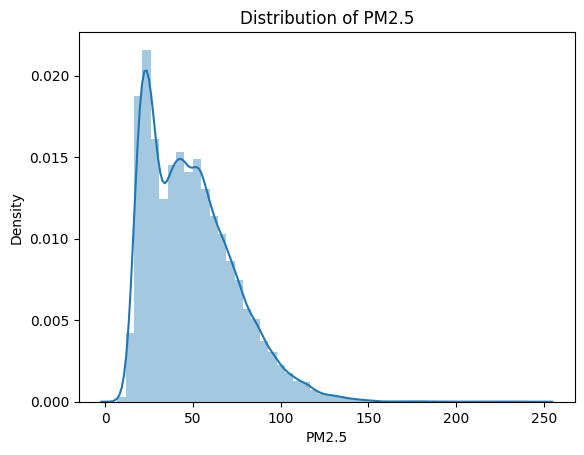

In [26]:
#show all Distribution featurs numerical

for i in num_df.columns:
    sns.distplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.show()

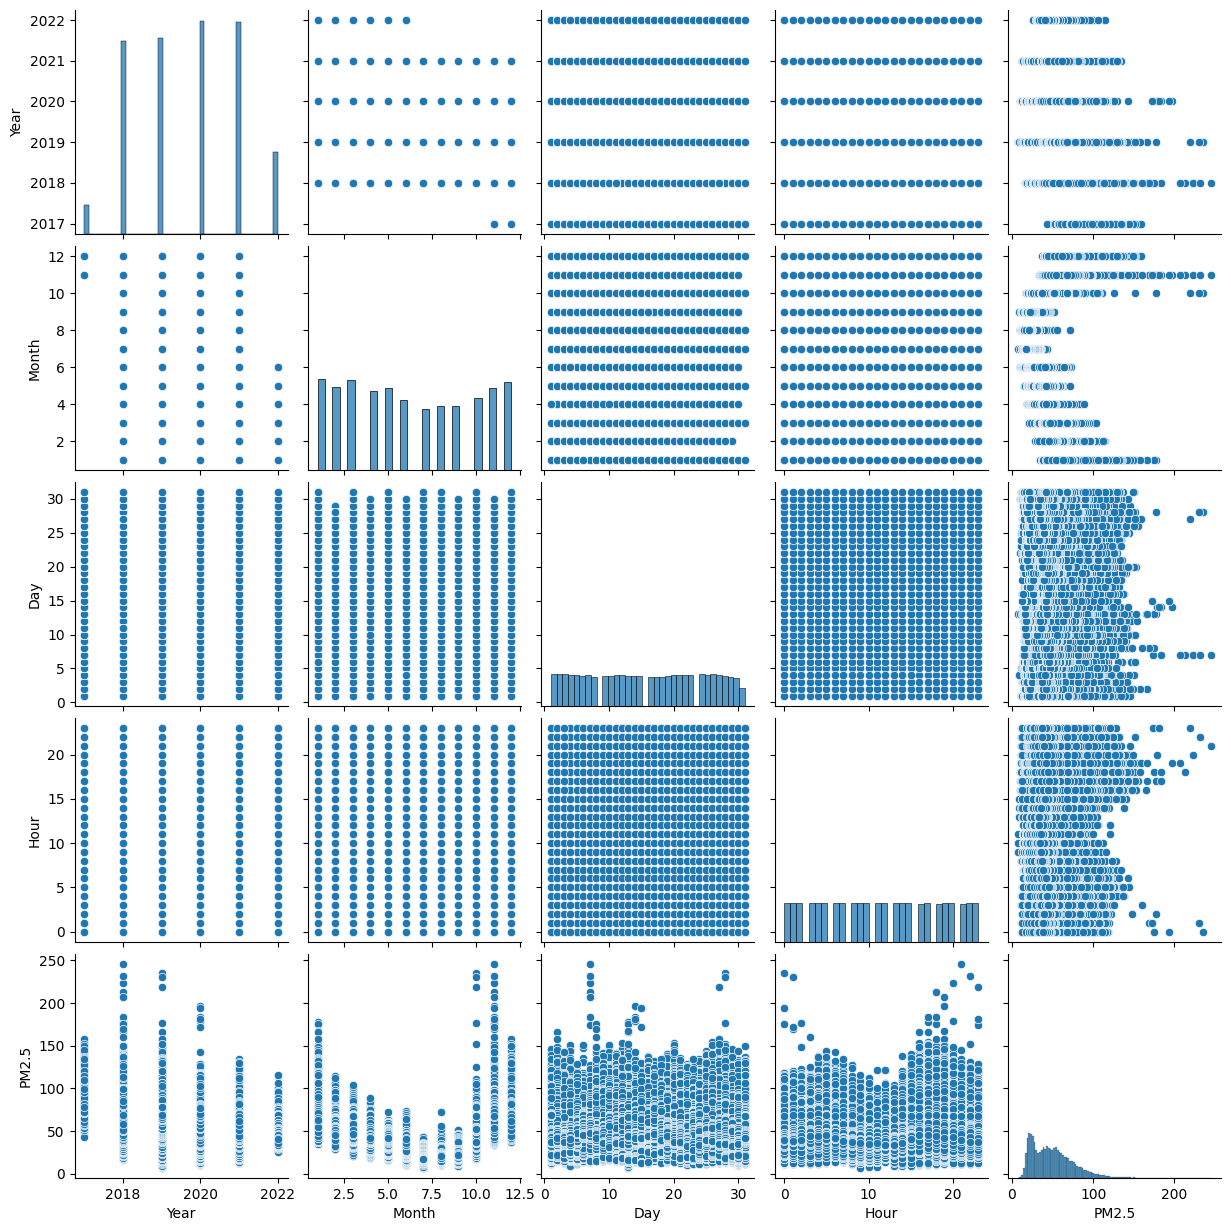

In [27]:
sns.pairplot(df)
plt.show()

# Data Preprocessing

In [28]:
df._get_numeric_data().corr()

,Year,Month,Day,Hour,PM2.5
Year,1.000000,-0.242207,0.008962,-0.000731,-0.221233
Month,-0.242207,1.000000,0.007797,-0.002514,0.003921
Day,0.008962,0.007797,1.000000,0.001403,-0.015409
Hour,-0.000731,-0.002514,0.001403,1.000000,0.052866
PM2.5,-0.221233,0.003921,-0.015409,0.052866,1.000000


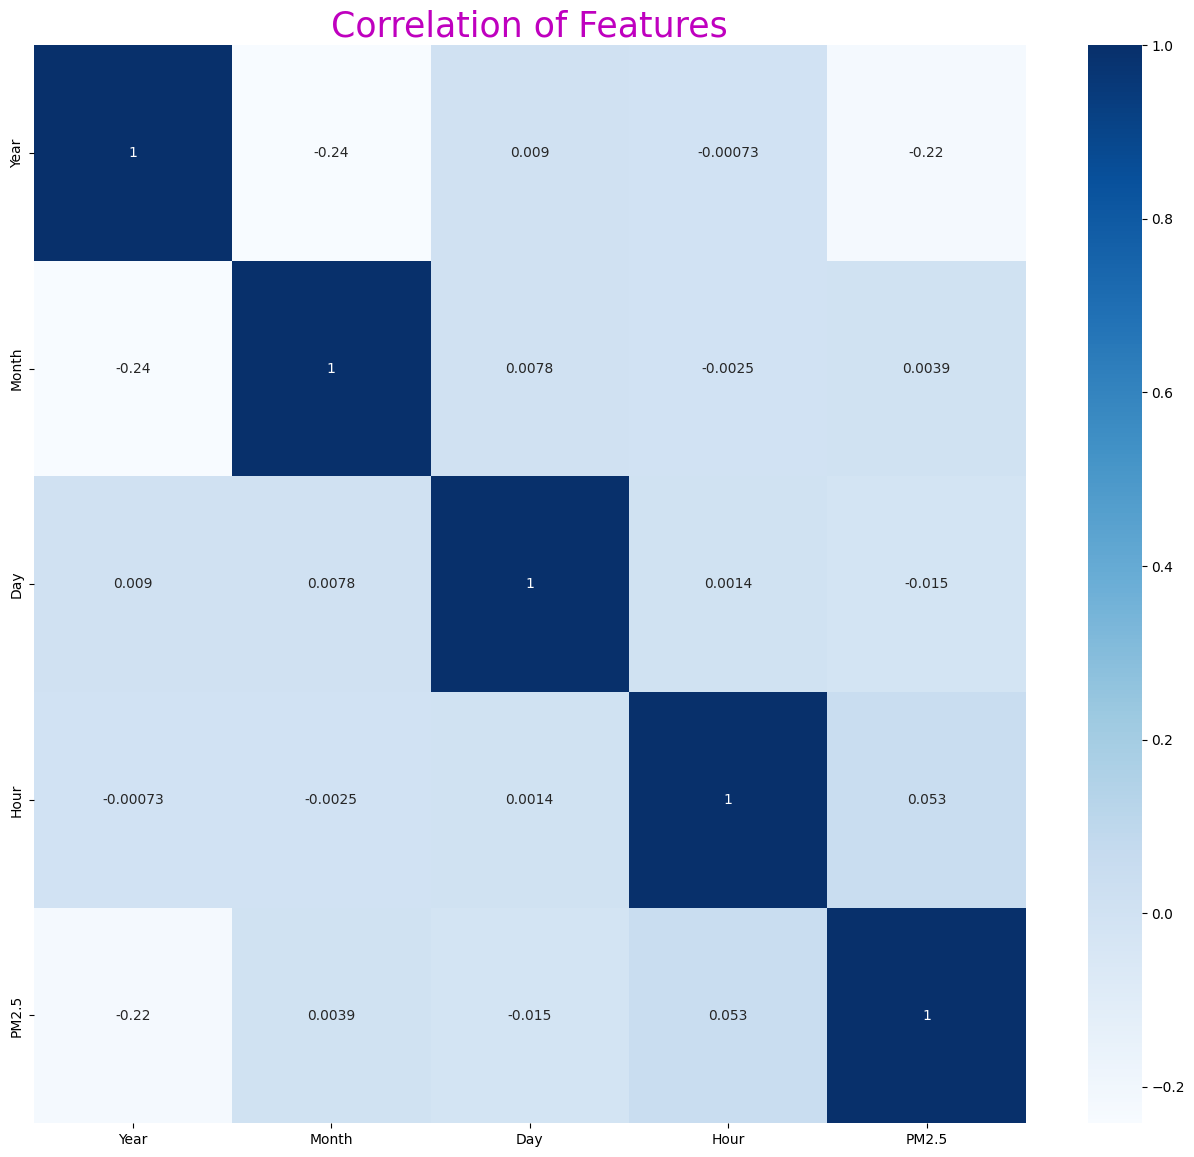

In [29]:
plt.figure(figsize=(16,14))
sns.heatmap(df._get_numeric_data().corr() , cmap="Blues" , annot=True)
plt.title("Correlation of Features", fontsize=25, color="m")
plt.show()

In [30]:
#check duplicated
df.duplicated().sum()

0

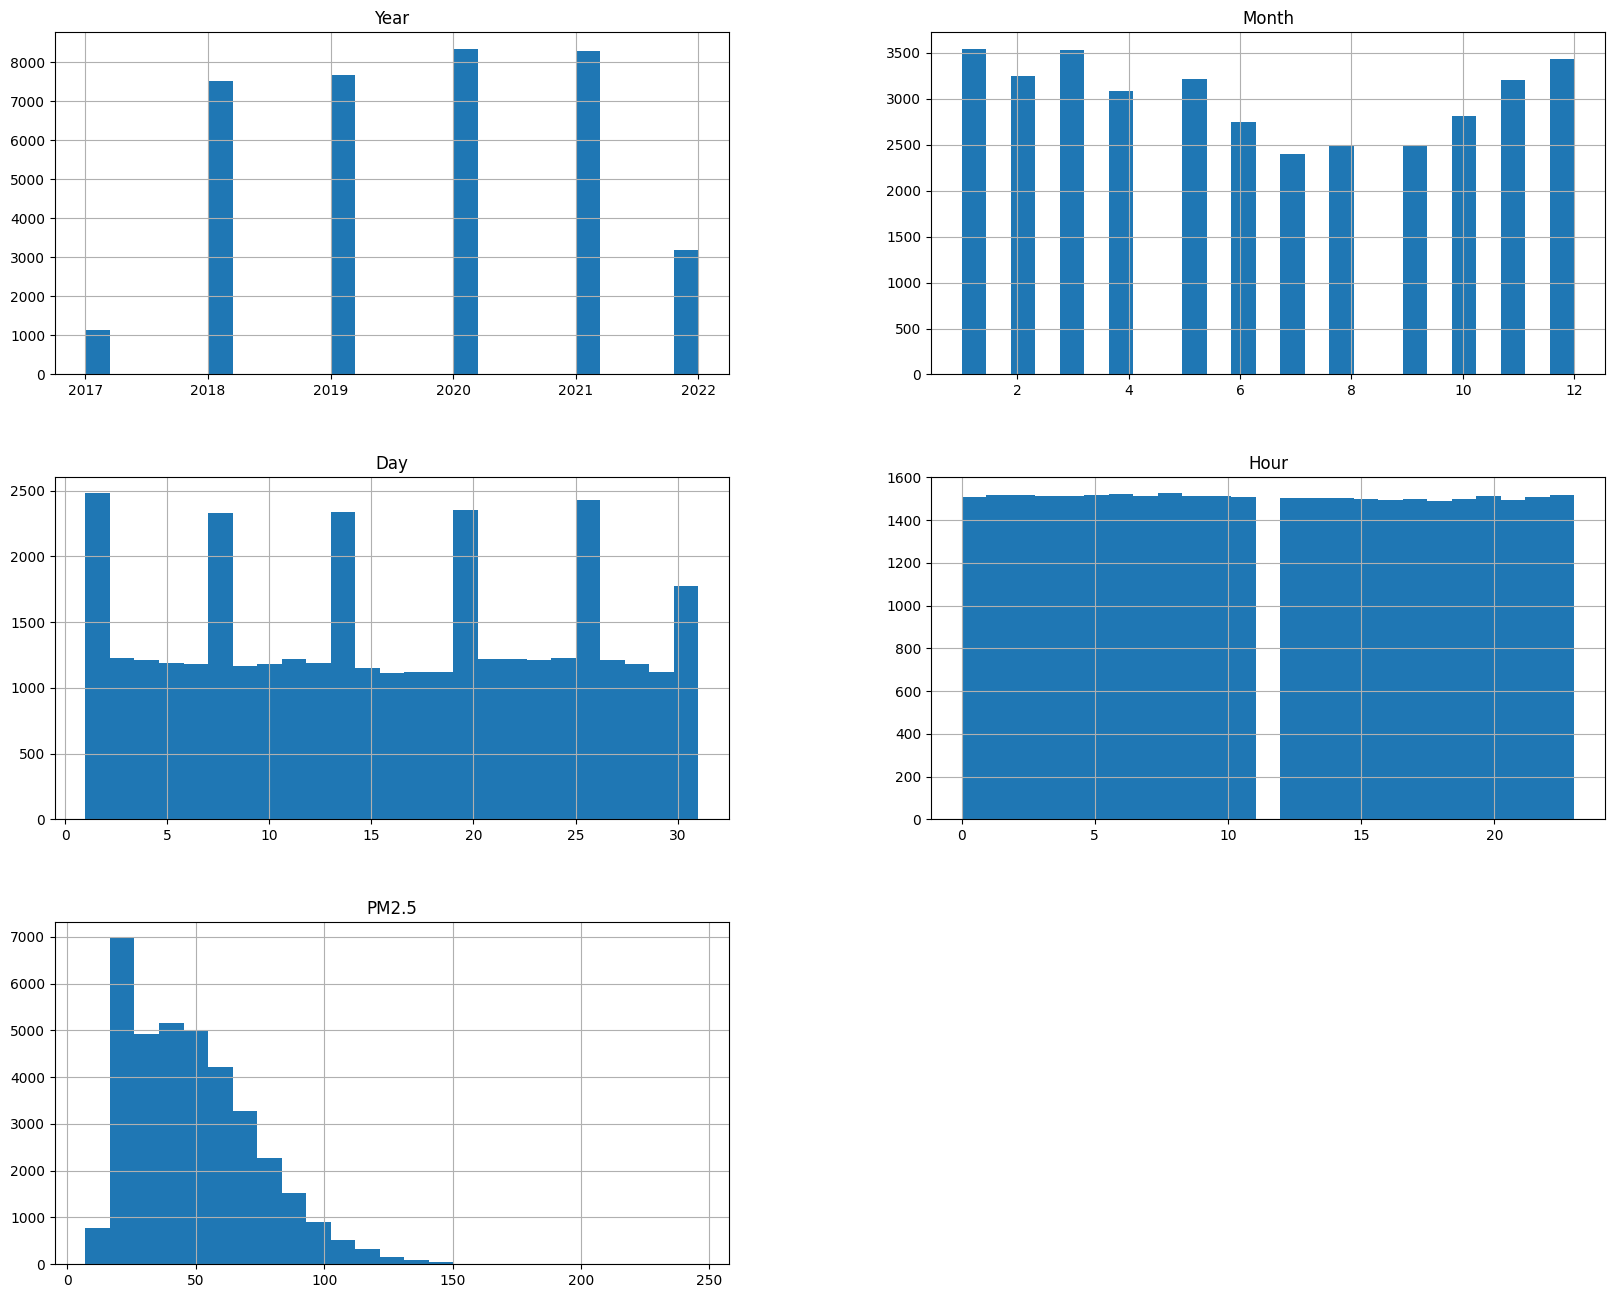

In [31]:
df.hist( bins=25 , figsize=(20,16))
plt.show()

In [32]:
df = df.drop(columns=["Timestamp"] , axis=1)
df

,Year,Month,Day,Hour,PM2.5
0,2017,11,7,12,64.51
1,2017,11,7,13,69.95
2,2017,11,7,14,92.79
3,2017,11,7,15,109.66
4,2017,11,7,16,116.50
...,...,...,...,...,...
36187,2022,6,4,11,35.89
36188,2022,6,4,12,33.83
36189,2022,6,4,13,33.05
36190,2022,6,4,14,35.29


In [33]:
# Drop the nulls
df = df.dropna()

In [34]:
df

,Year,Month,Day,Hour,PM2.5
0,2017,11,7,12,64.51
1,2017,11,7,13,69.95
2,2017,11,7,14,92.79
3,2017,11,7,15,109.66
4,2017,11,7,16,116.50
...,...,...,...,...,...
36187,2022,6,4,11,35.89
36188,2022,6,4,12,33.83
36189,2022,6,4,13,33.05
36190,2022,6,4,14,35.29


In [35]:
# get the numerical features
numerical_features = [col for col in df.columns if df[col].dtype in ["int32" , "int64" , "float32" , "float64"]]

# get the categorical_features 
categorical_features = [col for col in df.columns if df[col].dtype not in ["int32" , "int64" , "float32" , "float64"]]

if (numerical_features and categorical_features):
    print(f"categorical_features is == \n {categorical_features}")
    print("===================================================================")
    print(f"numerical_features is == \n {numerical_features}")
    
elif categorical_features:
    print(f"categorical_features is == \n {categorical_features}")
    
else:
    print(f"numerical_features is == \n {numerical_features}")

numerical_features is == 
 ['Year', 'Month', 'Day', 'Hour', 'PM2.5']


In [36]:
df

,Year,Month,Day,Hour,PM2.5
0,2017,11,7,12,64.51
1,2017,11,7,13,69.95
2,2017,11,7,14,92.79
3,2017,11,7,15,109.66
4,2017,11,7,16,116.50
...,...,...,...,...,...
36187,2022,6,4,11,35.89
36188,2022,6,4,12,33.83
36189,2022,6,4,13,33.05
36190,2022,6,4,14,35.29


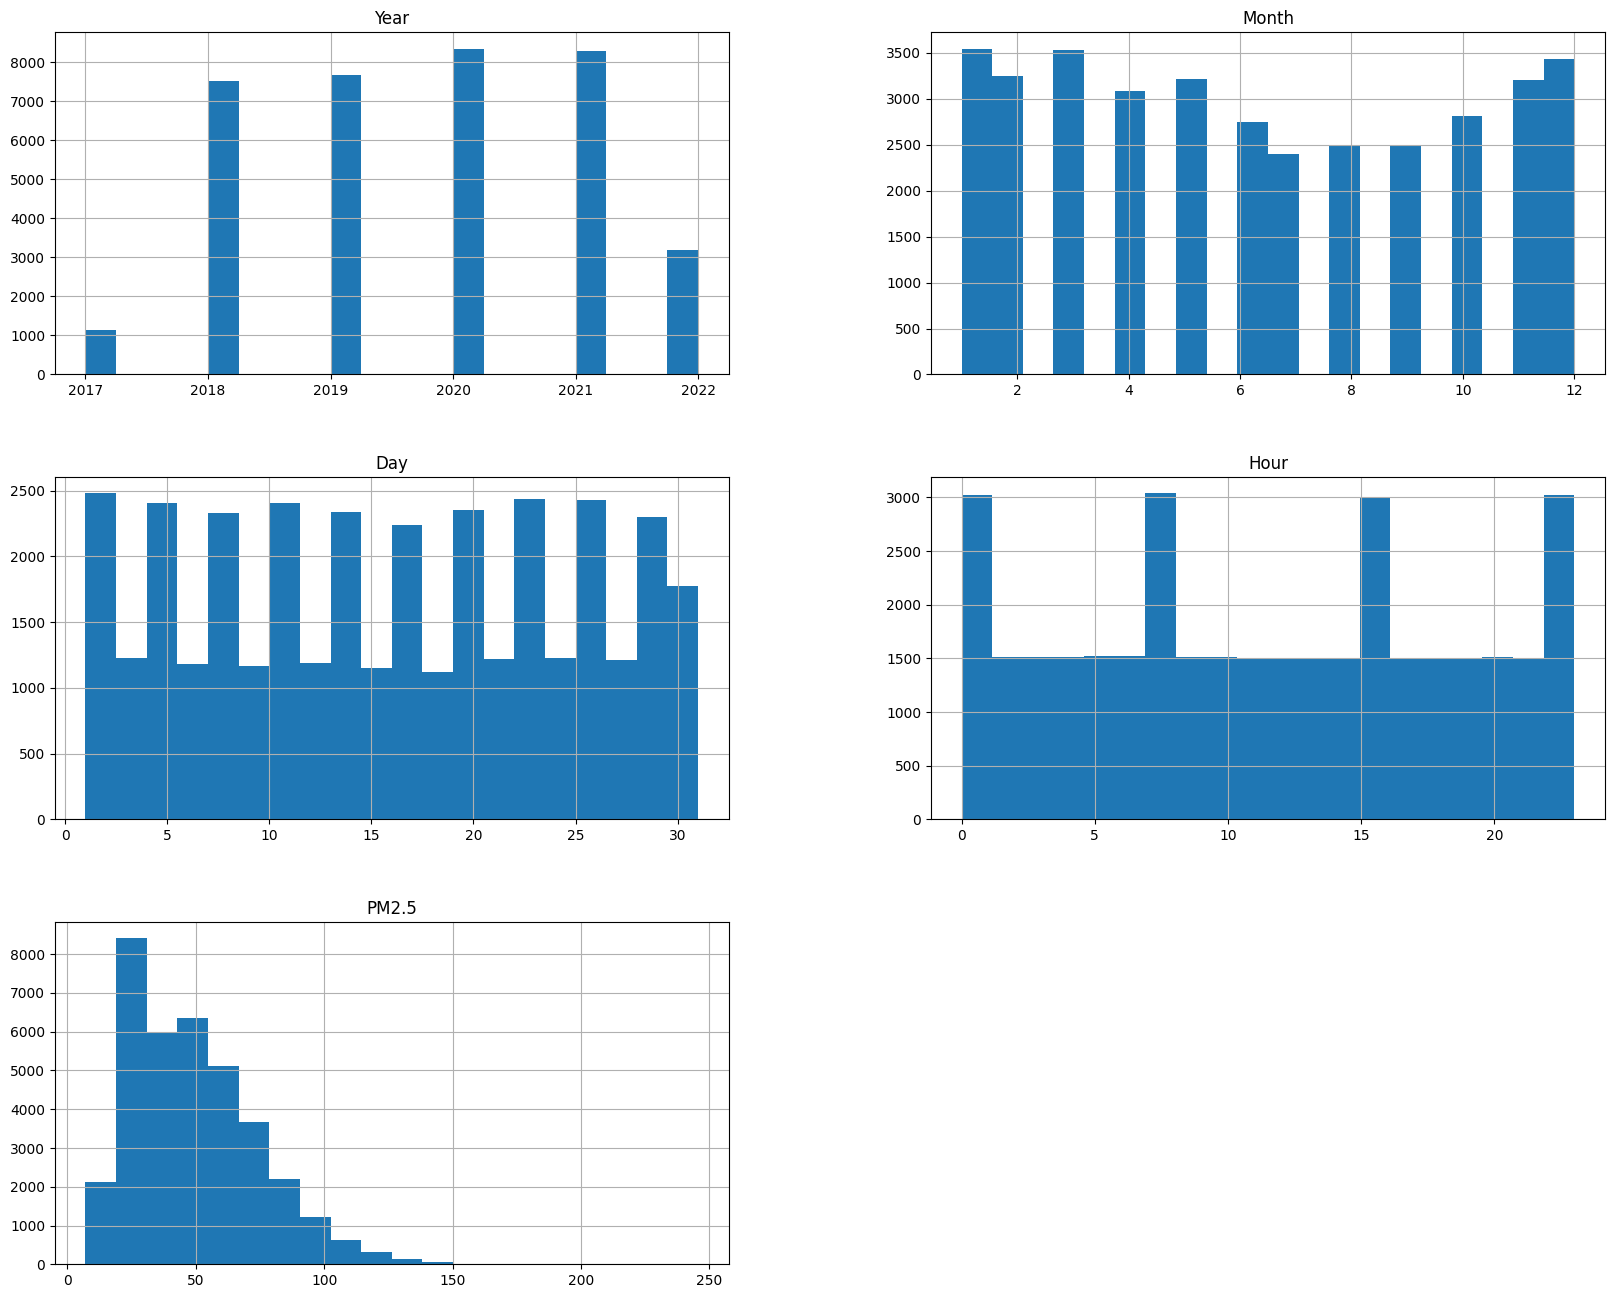

In [37]:
df.hist(bins=20 , figsize=(20,16))
plt.show()

# Solve skewed by log transform

In [38]:
colms = df.columns
colms

Index(['Year', 'Month', 'Day', 'Hour', 'PM2.5'], dtype='object')

In [39]:
colms = [cols for cols in df.columns]
for col in colms:
    df[col] = np.log(df[col] + 1e-10).astype(float)

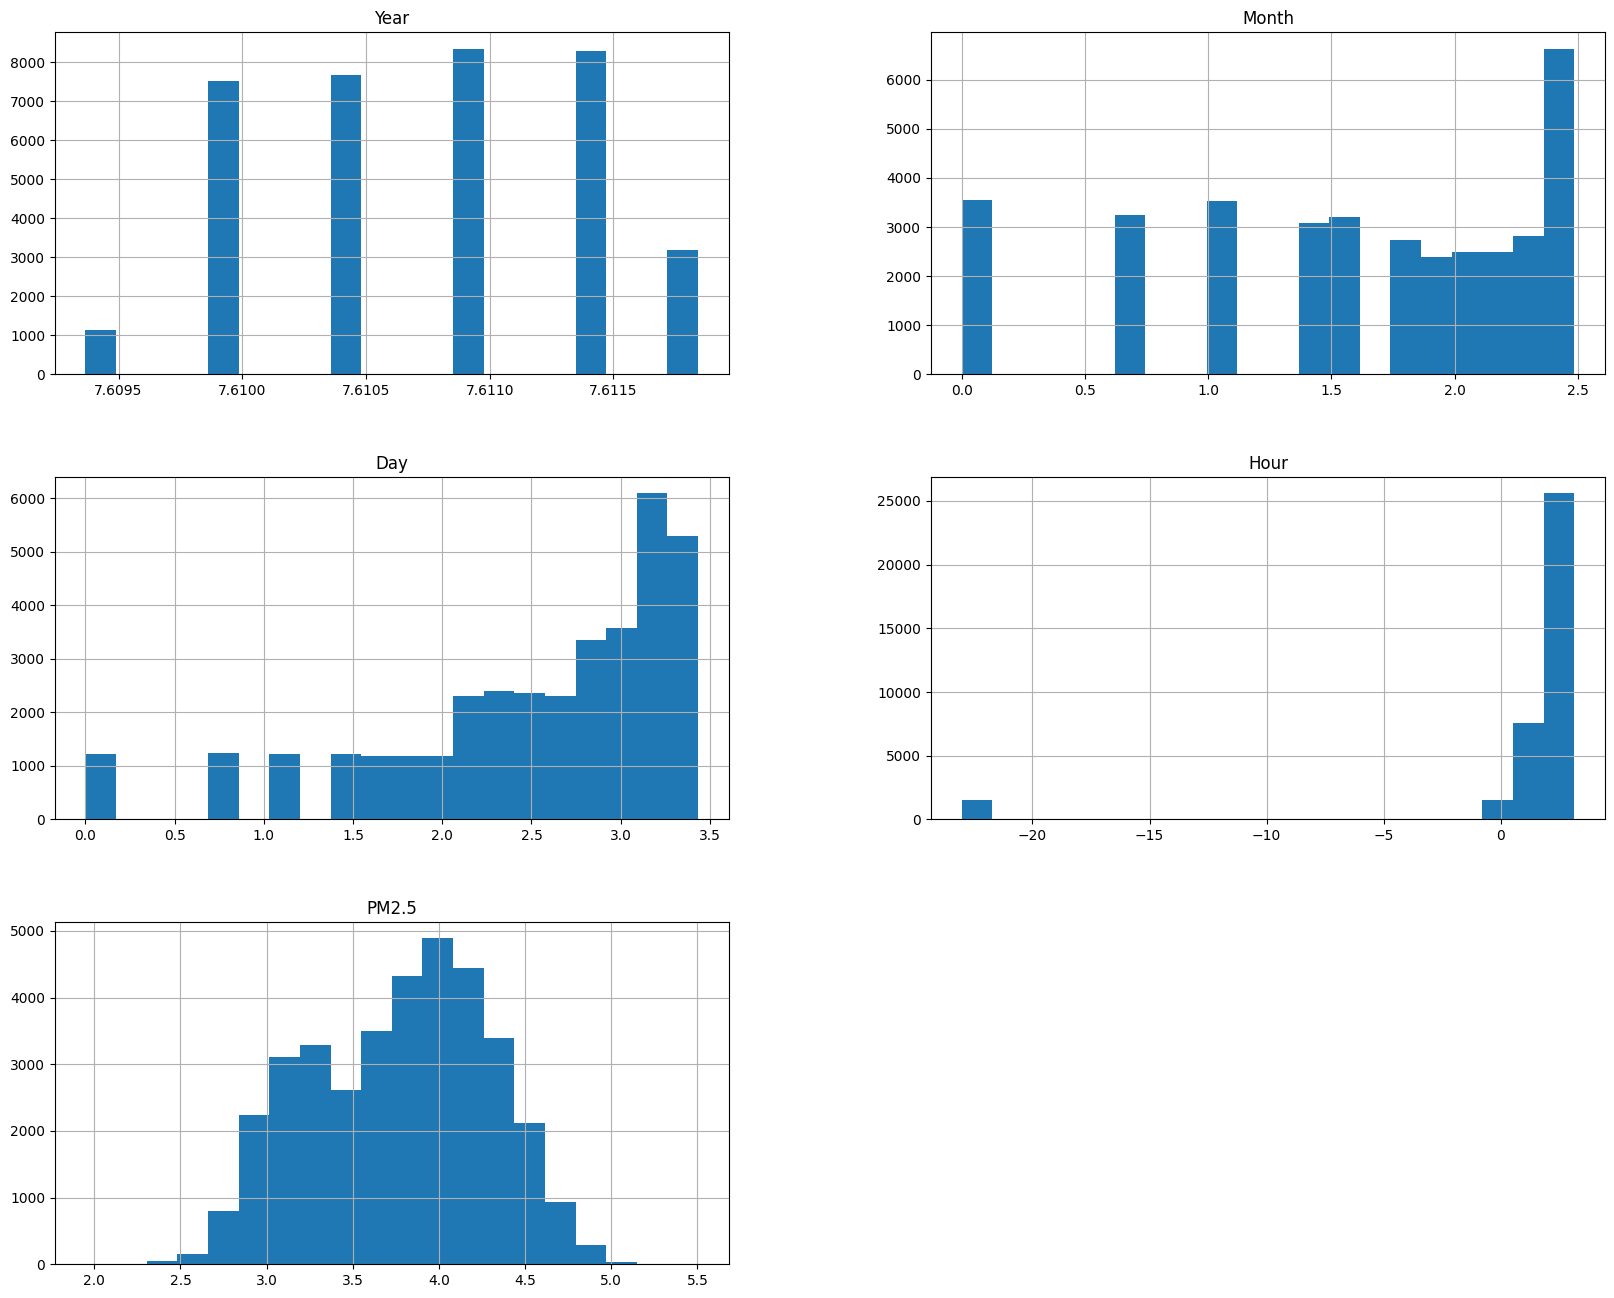

In [40]:
df.hist(bins=20 , figsize=(20,16))
plt.show()

In [41]:
df

,Year,Month,Day,Hour,PM2.5
0,7.609367,2.397895,1.945910,2.484907,4.166820
1,7.609367,2.397895,1.945910,2.564949,4.247781
2,7.609367,2.397895,1.945910,2.639057,4.530339
3,7.609367,2.397895,1.945910,2.708050,4.697385
4,7.609367,2.397895,1.945910,2.772589,4.757891
...,...,...,...,...,...
36187,7.611842,1.791759,1.386294,2.397895,3.580459
36188,7.611842,1.791759,1.386294,2.484907,3.521348
36189,7.611842,1.791759,1.386294,2.564949,3.498022
36190,7.611842,1.791759,1.386294,2.639057,3.563600


In [42]:
df.shape

(36192, 5)

# Split Data

In [43]:
X = df.drop(columns=["PM2.5"])
y = df["PM2.5"]

In [44]:
scale = StandardScaler()
X_scaler = scale.fit_transform(X)
X_scaler

array([[-1.9952517 ,  1.03277393, -0.64896835,  0.25361592],
       [-1.9952517 ,  1.03277393, -0.64896835,  0.26928725],
       [-1.9952517 ,  1.03277393, -0.64896835,  0.28379663],
       ...,
       [ 1.722559  ,  0.23191874, -1.30908513,  0.26928725],
       [ 1.722559  ,  0.23191874, -1.30908513,  0.28379663],
       [ 1.722559  ,  0.23191874, -1.30908513,  0.29730453]])

In [45]:
X_train , X_test , y_train , y_test = train_test_split(X_scaler , y, test_size=0.2 , shuffle=True)

print(f"The X_train shape == {X_train.shape}")
print(f"The y_train shape == {y_train.shape}")
print(f"The X_test shape == {X_test.shape}")
print(f"The y_test shape == {y_test.shape}")

The X_train shape == (28953, 4)
The y_train shape == (28953,)
The X_test shape == (7239, 4)
The y_test shape == (7239,)


In [46]:
len(X_train) , len(y_train)

(28953, 28953)

# Model ML

# RandomForestRegressor

In [47]:
Random = RandomForestRegressor()
Random.fit(X_train , y_train)

RandomForestRegressor()

In [48]:
# Define the hyperparameter grid
hyper_params = {
    "n_estimators": [i for i in range(100 ,500 ,100)],
    "max_depth": [i for i in range(3,15,3)],
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
}

# Create GridSearchCV object
random_hyper = RandomizedSearchCV(
    estimator=Random,
    param_distributions=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

# Fit the model
random_model = random_hyper.fit(X_train, y_train)


In [49]:
print("Best parameters : \n", random_model.best_params_)


Best parameters : 
 {'n_estimators': 400, 'max_depth': 12, 'criterion': 'squared_error'}


In [50]:
rand_sea = random_model.best_params_
rand_sea

{'n_estimators': 400, 'max_depth': 12, 'criterion': 'squared_error'}

In [51]:
best_estimator = RandomForestRegressor(**rand_sea)

cross_val = cross_val_score(estimator=best_estimator, X=X_train, y=y_train,
                            scoring="neg_mean_squared_error", cv=5, n_jobs=-1)

# Print the scores and the mean score
print("Scores are ==>>\n", abs(cross_val))
print("Cross-validation score mean is ==>>", cross_val.mean())

Scores are ==>>
 [0.01211169 0.01253294 0.01144046 0.01073298 0.01113893]
Cross-validation score mean is ==>> -0.011591400539907924


In [52]:
# Make cross-validation predictions
cross_val_pred = cross_val_predict(estimator=best_estimator, X=X_train, y=y_train,
                                   cv=5, method="predict", n_jobs=-1)

# Calculate mean squared error
mse = np.sqrt(mean_squared_error(y_train, cross_val_pred))

# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 0.1077


In [53]:
cols = df.columns
cols

Index(['Year', 'Month', 'Day', 'Hour', 'PM2.5'], dtype='object')

In [54]:
# Fit the best estimator with training data
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=400)

In [55]:
feat_import_forst = {}
for name , score in zip(cols , best_estimator.feature_importances_[:4]):
    feat_import_forst[name] = score

In [56]:
keys_forst = feat_import_forst.keys()
values_forst = feat_import_forst.values()

In [57]:
X = pd.DataFrame({"features": keys_forst, "Scores": values_forst})


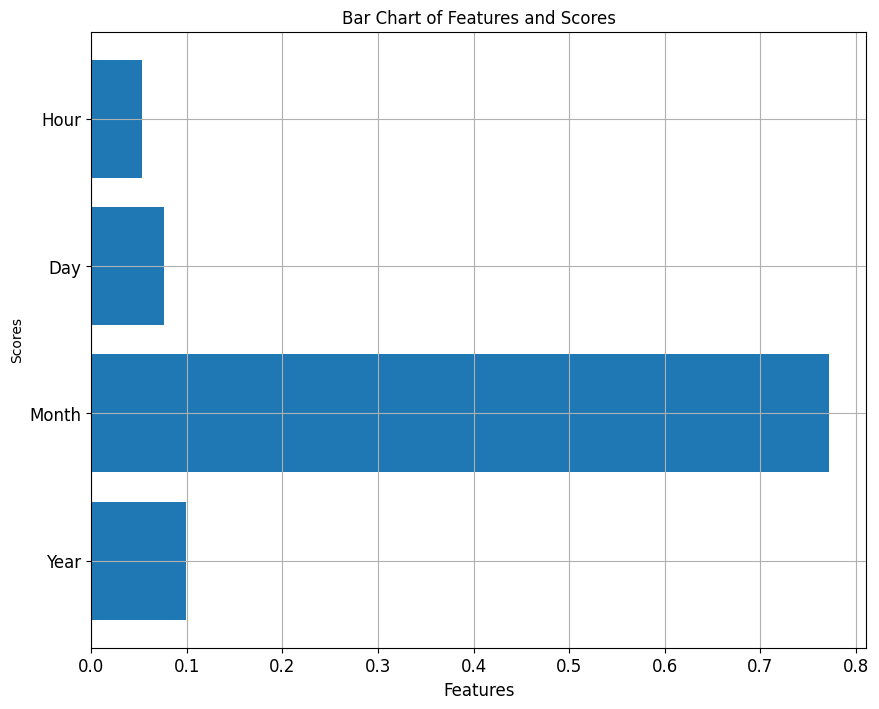

In [58]:
plt.figure(figsize=(10, 8))
plt.barh(X["features"], X["Scores"])
plt.xlabel("Features", fontsize=12)
plt.ylabel("Scores")
plt.title("Bar Chart of Features and Scores")
plt.xticks(c="k", fontsize=12)
plt.yticks(c="k", fontsize=12)
plt.grid(True)
plt.show()

In [59]:
test_predictions = best_estimator.predict(X_test)  

In [60]:
pd.DataFrame(np.c_[test_predictions, y_test], columns=["Prediction", "Actual"])

,Prediction,Actual
0,3.643082,3.645711
1,3.088986,2.976549
2,4.374563,4.390119
3,3.022689,3.052113
4,4.403715,4.390119
...,...,...
7234,4.670573,4.401707
7235,3.411931,3.300640
7236,3.173735,3.086030
7237,4.167032,4.190563


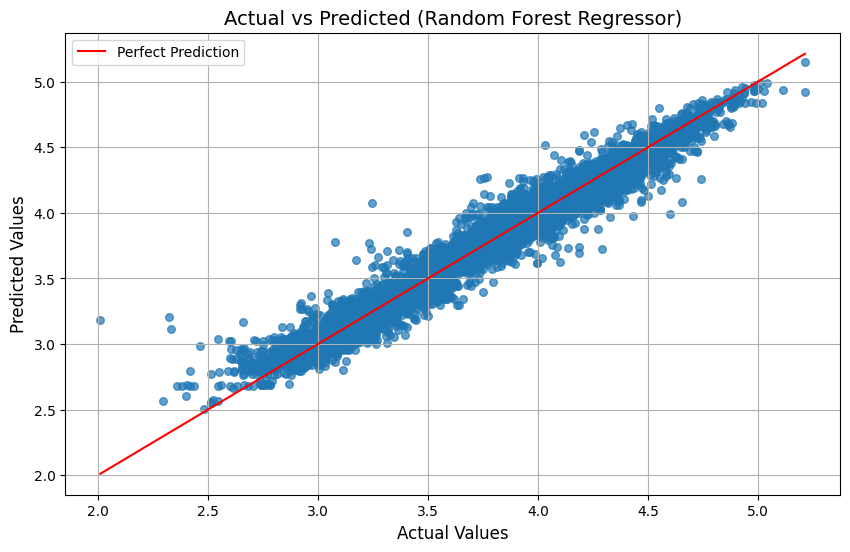

In [61]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, test_predictions, s=30, alpha=0.7)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test, 1))(np.unique(y_test)),
         color='red', label='Perfect Prediction')

plt.legend()
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted (Random Forest Regressor)", fontsize=14)
plt.grid(True)
plt.show()

# XGBRegressor

In [62]:
xgb_reg = xgp.XGBRegressor()
xgb_reg.fit(X_train , y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
cross_val_xgb = cross_val_score(estimator=xgb_reg , X=X_train , y=y_train ,
                            cv=5 , scoring="neg_mean_squared_error" , n_jobs=-1)

 
print("Score is ==>>\n ",abs(cross_val_xgb))

print("cross val score mean is ==>> ",cross_val_xgb.mean())

Score is ==>>
  [0.01424083 0.01397493 0.01357931 0.0129818  0.01292732]
cross val score mean is ==>>  -0.013540837785816037


In [64]:
# Make cross-validation predictions
cross_val_pred = cross_val_predict(estimator=xgb_reg, X=X_train, y=y_train,
                                   cv=5, method="predict", n_jobs=-1)



# Calculate mean squared error
mse =np.sqrt(mean_squared_error(y_train, cross_val_pred))
# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 0.1164


In [65]:
feat_import_forst = {}
for name , score in zip(cols , best_estimator.feature_importances_[:4]):
    feat_import_forst[name] = score

    
keys_forst = feat_import_forst.keys()
values_forst = feat_import_forst.values()

pd.DataFrame({"features" : keys_forst , "Scores" : values_forst})

,features,Scores
0,Year,0.099082
1,Month,0.772191
2,Day,0.075912
3,Hour,0.052815


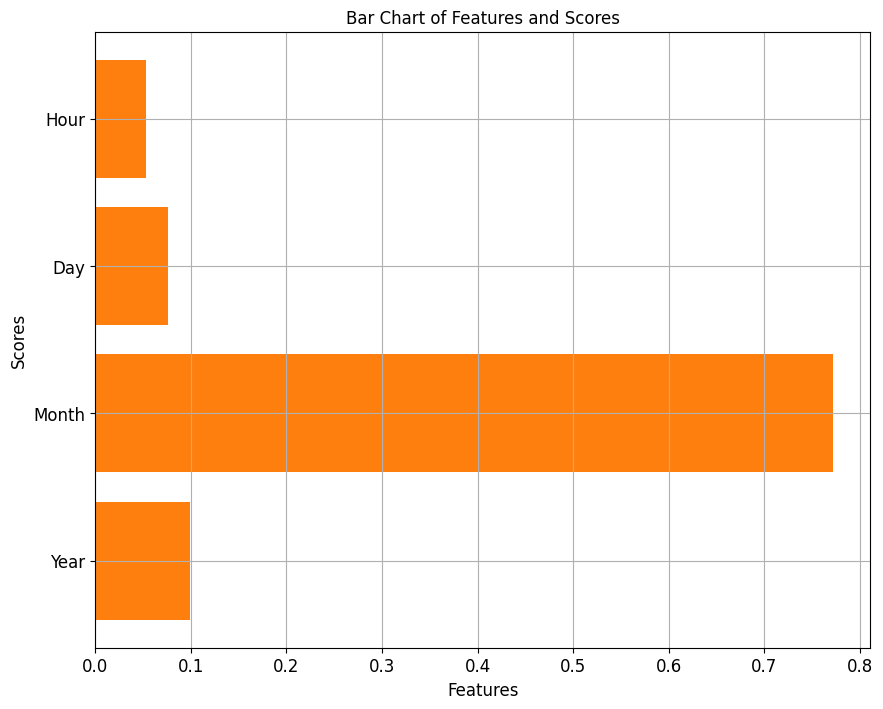

In [66]:
plt.figure(figsize=(10,8))
x = pd.DataFrame({"features": keys_forst, "Scores": values_forst})
plt.barh(y=x["features"], width=x["Scores"])  

plt.barh(y=x["features"], width=x["Scores"])  
plt.xlabel("Features", fontsize=12)
plt.ylabel("Scores" , fontsize=12)
plt.title("Bar Chart of Features and Scores")
plt.xticks(c="k", fontsize=12)
plt.yticks(c="k", fontsize=12)
plt.grid(True)
plt.show()

In [67]:
import joblib

In [68]:
joblib.dump(xgb_reg , "xgb_reg.pkl")

['xgb_reg.pkl']

In [69]:
final_model = joblib.load("xgb_reg.pkl")

# END

# BY : SAYED ALI